# **IMDB Review Classifier**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/320px-IMDB_Logo_2016.svg.png)


IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.


# Introduction:
Opinion mining (sometimes known as sentiment analysis or emotion AI) refers to
the use of natural language processing, text analysis, computational linguistics,
and biometrics to systematically identify, extract, quantify, and study affective
states and subjective information.

We can use classifiers on textual data to classify the text into its signified
emotion. This can be used in various ways to predict the sentiments of any text
automatically after it is trained in a corpus of sentences.


# Dataset
The dataset is in form of a txt file and can be downloaded from:

https://drive.google.com/file/d/1zXOovxa6RSqmIOaFu9RNlluVlmyBfJ0M/view?usp=sharing


- 1 Positive Sentiment
- 0 Negative Sentiment


# What is Sentiment Analysis ? 
 Let's Understand first. !
 
Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative 
 Let try this. !

 

### Importing Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [179]:
data=pd.read_csv('imdb_labelled.txt', delimiter='\t+',names=["review","t_sentiment"])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [180]:
data.head(10)

,review,t_sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


prints the first 10 rows of the data.

By default if donot give number to the head , will prints first 5 rows.

In [183]:
data.describe(include='all')

,review,t_sentiment
count,1000,1000.00000
unique,997,NaN
top,Not recommended.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [5]:
print(data.shape)
print(data.columns)


(1000, 2)
Index(['review', 't_sentiment'], dtype='object')


Tota1 rows =1000

Total columns=2

In [25]:
print(data['t_sentiment'].value_counts())


1    500
0    500
Name: t_sentiment, dtype: int64


Total Postive Sentiment =500

Total Neagtive Sentiment=500


# EDA
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


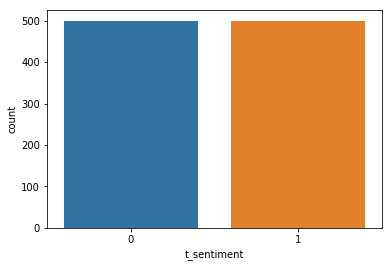

In [26]:
sns.countplot(x='t_sentiment',data=data)

Blue bar is negative sentiment (0)

Orange bar is positive sentiment (1)

# Word Cloud
A word cloud  is a data visualization technique which highlights the important textual data points from a big text corpus. The approach used creates a meaningful visualization of text which could really help to understand high prominence of words that appear more frequently. This type of visualization can assist in exploratory text analysis by identifying important textual data points (which may be potential features) and contextual themes appearing in a set of documents.

In a word cloud visual, the more common words in the documents appear larger and bolder. Word Cloud generators break down the text into word tokens and count how frequently they appear in the entire corpus. The font point size is assigned to each word based on the frequency it appears in the text.


# Stopwords
These are the words which donot provide useful information . For Example 
#### 'a' , 'an', 'the' etc.

First, Creating word cloud for  **Negative Sentiment**

In [27]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
df=data[data['t_sentiment']==0]
words = ' '.join(df['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      height=1080,width=1000
                     ).generate(cleaned_word)

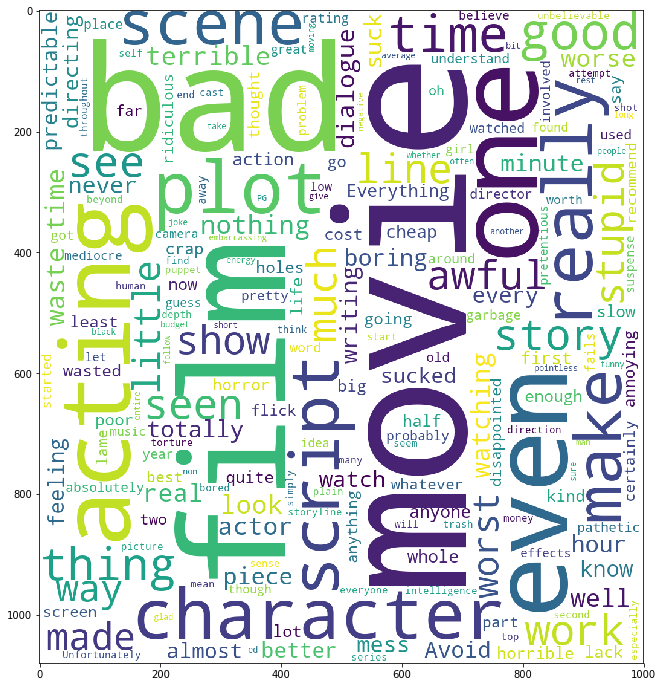

In [30]:
plt.figure(1,figsize=(18,12))
plt.imshow(wordcloud)
plt.show()


**For Positive Sentiment**

In [31]:
df=data[data['t_sentiment']==1]
wordsp = ' '.join(df['review'])
cleaned_word1 = " ".join([wordp for wordp in wordsp.split()
                            if 'http' not in wordp
                                and not wordp.startswith('@')
                                and wordp != 'RT'
                            ])


In [32]:
wordcloudp = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1080,
                      height=1000
                     ).generate(cleaned_word1)

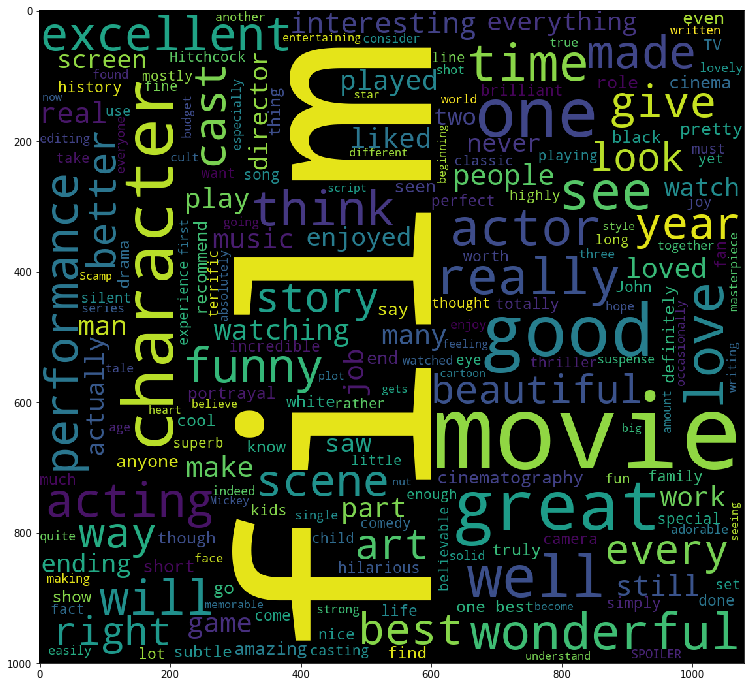

In [33]:
plt.figure(1,figsize=(18,12))
plt.imshow(wordcloudp)
plt.show()


# Data Preprocessing


In [34]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [35]:
stemmer=PorterStemmer()

In [36]:
def preprocess(r_word):
    letters_only = re.sub("[^a-zA-Z]", " ",r_word)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming
    words = [stemmer.stem(word) for word in words]
   
    return(" ".join(words))
   

In [38]:
data['c_review']=data['review'].apply(lambda x: preprocess(x))

data.head()


,review,t_sentiment,c_review
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...
3,Very little music or anything to speak of.,0,littl music anyth speak
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...


# Glove
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [39]:
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


### Download glove.6B.50d.txt from below link:-

http://nlp.stanford.edu/data/glove.6B.zip

In [41]:

glove2word2vec(glove_input_file='glove.6B.50d.txt',word2vec_output_file="CVectors.txt")
model=KeyedVectors.load_word2vec_format("CVectors.txt")

we will make two dataframe for unweighted sentence vector and normalised sentence vector

 - ## Unweighted Sentence Vector :
    Let’s suppose we have a sentence ‘S’ which has 3 words (w1, w2, w3) and we want to predict its sentiment. 
Each of the word has 50-dim word vectors [fd1 , fd2 , fd3 , ........ , fd50]. To get the sentence vector we just add the word vectors for all the words in the sentence along each dimension. In this case: 
Sentence vector(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))

- ## Normalised Sentence Vector :
    Sentence vector normalized(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))/ (number of words)

### For Unweighted


In [47]:
List=[0]*50

def  s_sum(x,List,val):

    vector=List
    for i in x:
        try:
            vector=np.add(vector,model[i])
        except:
            vector=np.add(vector,List)
            continue
    return vector[val]

In [48]:
unwgt=data

for i in range(50):
    unwgt['feat'+str(i)]=unwgt['c_review'].apply(s_sum,args=[List,i])
print("Unweighted :")
unwgt.head(10)


Unweighted :


,review,t_sentiment,c_review,feat0,feat1,feat2,feat3,feat4,feat5,feat6,...,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,feat48,feat49
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man,-4.197564,38.599630,26.597819,28.773070,12.019606,-2.796592,17.91815,...,30.318663,1.836787,-3.325347,-6.426317,-5.427331,13.666963,7.766495,-18.603126,12.761814,33.949570
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk,-5.360641,29.964580,25.472774,26.135550,17.642156,5.047866,14.88841,...,29.368261,4.551691,-12.723127,-0.664520,-4.105170,13.336035,8.802163,-10.968968,11.866485,37.856241
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-7.471877,79.155031,61.863741,63.561971,39.114575,2.377331,31.51271,...,76.863811,6.774646,-22.014274,4.026643,-7.272920,29.995502,19.717337,-39.834401,35.024002,78.983641
3,Very little music or anything to speak of.,0,littl music anyth speak,-2.429580,15.870500,14.719219,13.581720,10.725060,-0.731814,7.89570,...,13.393341,-1.855404,-4.418319,0.518827,-2.197795,2.092962,4.294747,-7.061218,7.199637,14.522490
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,-1.437613,34.956560,30.285034,29.842580,11.505750,-0.170489,18.92531,...,35.921137,7.672367,-9.201550,-2.447553,-4.848333,16.939742,8.625989,-18.055855,11.998434,47.643901
5,"The rest of the movie lacks art, charm, meanin...",0,rest movi lack art charm mean empti work guess...,-5.060242,38.760730,33.436864,31.293670,17.010846,-0.254305,15.50600,...,33.400127,2.603767,-8.038705,4.060161,-5.060063,10.819471,10.451813,-17.977619,11.043360,35.109611
6,Wasted two hours.,0,wast two hour,-3.584252,10.919480,7.789400,9.762280,3.454532,-1.329416,4.96076,...,9.224060,0.055057,-2.907110,-0.598535,0.706075,2.672833,0.873195,-5.630909,4.908394,10.047060
7,Saw the movie today and thought it was a good ...,1,saw movi today thought good effort good messag...,-5.467158,40.594550,23.561252,32.991340,12.499276,-1.606365,18.92067,...,32.654571,2.333391,-4.758278,-7.465787,-1.629105,11.714942,6.249578,-21.907967,15.215990,43.951050
8,A bit predictable.,0,bit predict,-1.285620,5.728420,6.434684,5.696250,3.806140,1.092314,2.10018,...,6.712511,2.265684,-2.315596,2.134150,0.283873,4.382250,1.634295,-4.479380,1.639536,11.603790
9,Loved the casting of Jimmy Buffet as the scien...,1,love cast jimmi buffet scienc teacher,-3.294901,24.283650,21.559984,21.486170,12.660110,-4.279647,11.80536,...,28.479577,2.939434,-2.515512,0.627667,-2.952827,11.990213,6.492439,-13.737908,9.483167,25.999710


In [49]:
List=[0]*50

def s_sum(x,List,val):
    v=List
    
    for i in x:
        try:
            v=np.add(v,model[i])
        except:
            v=np.add(v,List)
            continue
            
    v=np.divide(v,len(v))
    return v[val]




In [51]:
norm=data
for i in range(50):
    norm['feat'+str(i)]=unwgt['c_review'].apply(s_sum,args=[List,i])
print("Normalised :")
norm.head(10)

Normalised :


,review,t_sentiment,c_review,feat0,feat1,feat2,feat3,feat4,feat5,feat6,...,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,feat48,feat49
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man,-0.083951,0.771993,0.531956,0.575461,0.240392,-0.055932,0.358363,...,0.606373,0.036736,-0.066507,-0.128526,-0.108547,0.273339,0.155330,-0.372063,0.255236,0.678991
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk,-0.107213,0.599292,0.509455,0.522711,0.352843,0.100957,0.297768,...,0.587365,0.091034,-0.254463,-0.013290,-0.082103,0.266721,0.176043,-0.219379,0.237330,0.757125
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-0.149438,1.583101,1.237275,1.271239,0.782292,0.047547,0.630254,...,1.537276,0.135493,-0.440285,0.080533,-0.145458,0.599910,0.394347,-0.796688,0.700480,1.579673
3,Very little music or anything to speak of.,0,littl music anyth speak,-0.048592,0.317410,0.294384,0.271634,0.214501,-0.014636,0.157914,...,0.267867,-0.037108,-0.088366,0.010377,-0.043956,0.041859,0.085895,-0.141224,0.143993,0.290450
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,-0.028752,0.699131,0.605701,0.596852,0.230115,-0.003410,0.378506,...,0.718423,0.153447,-0.184031,-0.048951,-0.096967,0.338795,0.172520,-0.361117,0.239969,0.952878
5,"The rest of the movie lacks art, charm, meanin...",0,rest movi lack art charm mean empti work guess...,-0.101205,0.775215,0.668737,0.625873,0.340217,-0.005086,0.310120,...,0.668003,0.052075,-0.160774,0.081203,-0.101201,0.216389,0.209036,-0.359552,0.220867,0.702192
6,Wasted two hours.,0,wast two hour,-0.071685,0.218390,0.155788,0.195246,0.069091,-0.026588,0.099215,...,0.184481,0.001101,-0.058142,-0.011971,0.014121,0.053457,0.017464,-0.112618,0.098168,0.200941
7,Saw the movie today and thought it was a good ...,1,saw movi today thought good effort good messag...,-0.109343,0.811891,0.471225,0.659827,0.249986,-0.032127,0.378413,...,0.653091,0.046668,-0.095166,-0.149316,-0.032582,0.234299,0.124992,-0.438159,0.304320,0.879021
8,A bit predictable.,0,bit predict,-0.025712,0.114568,0.128694,0.113925,0.076123,0.021846,0.042004,...,0.134250,0.045314,-0.046312,0.042683,0.005677,0.087645,0.032686,-0.089588,0.032791,0.232076
9,Loved the casting of Jimmy Buffet as the scien...,1,love cast jimmi buffet scienc teacher,-0.065898,0.485673,0.431200,0.429723,0.253202,-0.085593,0.236107,...,0.569592,0.058789,-0.050310,0.012553,-0.059057,0.239804,0.129849,-0.274758,0.189663,0.519994


In [52]:
#drop cloumns review,c_sentiment,t_sentiment

norm=norm.drop(['review','c_review'],axis=1)
unwgt=unwgt.drop(['review','c_review'],axis=1)
Y_norm=norm['t_sentiment']
Y_unwgt=unwgt['t_sentiment']
norm=norm.drop(['t_sentiment'],axis=1)
unwgt=unwgt.drop(['t_sentiment'],axis=1)


In [53]:
#after dropping the columns we left with,
print("Unweighted dataset")
unwgt.head()

Unweighted dataset


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,feat48,feat49
0,-0.083951,0.771993,0.531956,0.575461,0.240392,-0.055932,0.358363,-0.539073,-0.237162,-0.090333,...,0.606373,0.036736,-0.066507,-0.128526,-0.108547,0.273339,0.155330,-0.372063,0.255236,0.678991
1,-0.107213,0.599292,0.509455,0.522711,0.352843,0.100957,0.297768,-0.661147,-0.197990,0.003222,...,0.587365,0.091034,-0.254463,-0.013290,-0.082103,0.266721,0.176043,-0.219379,0.237330,0.757125
2,-0.149438,1.583101,1.237275,1.271239,0.782292,0.047547,0.630254,-1.571610,-0.529359,-0.109869,...,1.537276,0.135493,-0.440285,0.080533,-0.145458,0.599910,0.394347,-0.796688,0.700480,1.579673
3,-0.048592,0.317410,0.294384,0.271634,0.214501,-0.014636,0.157914,-0.326997,-0.140687,-0.008164,...,0.267867,-0.037108,-0.088366,0.010377,-0.043956,0.041859,0.085895,-0.141224,0.143993,0.290450
4,-0.028752,0.699131,0.605701,0.596852,0.230115,-0.003410,0.378506,-0.575283,-0.186741,-0.042045,...,0.718423,0.153447,-0.184031,-0.048951,-0.096967,0.338795,0.172520,-0.361117,0.239969,0.952878


In [54]:
print("Normalised Dataset")
norm.head()

Normalised Dataset


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,feat48,feat49
0,-0.083951,0.771993,0.531956,0.575461,0.240392,-0.055932,0.358363,-0.539073,-0.237162,-0.090333,...,0.606373,0.036736,-0.066507,-0.128526,-0.108547,0.273339,0.155330,-0.372063,0.255236,0.678991
1,-0.107213,0.599292,0.509455,0.522711,0.352843,0.100957,0.297768,-0.661147,-0.197990,0.003222,...,0.587365,0.091034,-0.254463,-0.013290,-0.082103,0.266721,0.176043,-0.219379,0.237330,0.757125
2,-0.149438,1.583101,1.237275,1.271239,0.782292,0.047547,0.630254,-1.571610,-0.529359,-0.109869,...,1.537276,0.135493,-0.440285,0.080533,-0.145458,0.599910,0.394347,-0.796688,0.700480,1.579673
3,-0.048592,0.317410,0.294384,0.271634,0.214501,-0.014636,0.157914,-0.326997,-0.140687,-0.008164,...,0.267867,-0.037108,-0.088366,0.010377,-0.043956,0.041859,0.085895,-0.141224,0.143993,0.290450
4,-0.028752,0.699131,0.605701,0.596852,0.230115,-0.003410,0.378506,-0.575283,-0.186741,-0.042045,...,0.718423,0.153447,-0.184031,-0.048951,-0.096967,0.338795,0.172520,-0.361117,0.239969,0.952878


### Test Train Split

- ### Unweight Data

In [140]:
from sklearn.model_selection import train_test_split
X_Train_unwgt,X_Test_unwgt,Y_Train_unwgt,Y_Test_unwgt=train_test_split(unwgt,Y_unwgt,test_size=0.2,random_state=0)

- ### Normalised Data

In [141]:
# Splittinng normalized data for training and testing
X_Train_norm,X_Test_norm,Y_Train_norm,Y_Test_norm=train_test_split(norm,Y_norm,test_size=0.2,random_state=0)

## Applying Different Classifiers

## Naive Bayes(Unweigted Data)
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.

In [142]:

from sklearn.naive_bayes import GaussianNB
Nb=GaussianNB()
Nb.fit(X_Train_unwgt,Y_Train_unwgt)

GaussianNB(priors=None, var_smoothing=1e-09)

In [143]:
Pred1=Nb.predict(X_Test_unwgt)


In [144]:
from sklearn.metrics import accuracy_score , f1_score
a1=(accuracy_score(Pred1,Y_Test_unwgt)*100)
print("Accuracy = {:.1f} %".format(accuracy_score(Pred1,Y_Test_unwgt)*100))
f1=(f1_score(Y_Test_unwgt,Pred1))
print("f1-Score = {:.1} ".format(f1_score(Y_Test_unwgt,Pred1)))


Accuracy = 51.0 %
f1-Score = 0.4 


## Logistic Regression
 Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
 
 ### Unweighted Data

In [145]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_Train_unwgt,Y_Train_unwgt)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
Pred2=log.predict(X_Test_unwgt)


In [147]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred2,Y_Test_unwgt)*100))
a2=(accuracy_score(Pred2,Y_Test_unwgt)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred2,Y_Test_unwgt)))
f2=(f1_score(Pred2,Y_Test_unwgt))

Accuracy = 54.00 %
f1-Score = 0.51 


## SVM (Suppport Vector Machine)-Linear
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
### Unweighted Data

In [148]:
from sklearn.svm import SVC
modell = SVC(kernel='linear')
modell.fit(X_Train_unwgt,Y_Train_unwgt)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [149]:
Pred4 = modell.predict(X_Test_unwgt)

In [150]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred4,Y_Test_unwgt)*100))
a3=(accuracy_score(Pred4,Y_Test_unwgt)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred4,Y_Test_unwgt)))
f3=(f1_score(Pred4,Y_Test_unwgt))

Accuracy = 49.50 %
f1-Score = 0.37 


## SVM (Suppport Vector Machine)-rbf

In [151]:
modelr = SVC(kernel='rbf')
modelr.fit(X_Train_unwgt,Y_Train_unwgt)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [152]:
Pred5=modelr.predict(X_Test_unwgt)

In [153]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred5,Y_Test_unwgt)*100))
a4=(accuracy_score(Pred5,Y_Test_unwgt)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred5,Y_Test_unwgt)))
f4=(f1_score(Pred5,Y_Test_unwgt))

Accuracy = 51.00 %
f1-Score = 0.39 


## Random Forest Classifier
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
### Unweighted Data

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_Train_unwgt,Y_Train_unwgt)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
Pred6=rf.predict(X_Test_unwgt)

In [156]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred6,Y_Test_unwgt)*100))
a5=(accuracy_score(Pred6,Y_Test_unwgt)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred6,Y_Test_unwgt)))
f5=(f1_score(Pred6,Y_Test_unwgt))

Accuracy = 53.00 %
f1-Score = 0.49 


#### now applying on normalised data
### NAIVE BAYES

In [157]:
from sklearn.naive_bayes import GaussianNB
Nb1=GaussianNB()
Nb1.fit(X_Train_norm,Y_Train_norm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [158]:
Pred7=Nb1.predict(X_Test_norm)

In [159]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred7,Y_Test_norm)*100))
b_1=(accuracy_score(Pred7,Y_Test_norm)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred7,Y_Test_norm)))
f_1=(f1_score(Pred7,Y_Test_norm))


Accuracy = 51.00 %
f1-Score = 0.39 


### Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()
lr1.fit(X_Train_norm,Y_Train_norm)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
Pred8=lr1.predict(X_Test_norm)


In [162]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred8,Y_Test_norm)*100))
b_2=(accuracy_score(Pred8,Y_Test_norm)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred8,Y_Test_norm)))
f_2=(f1_score(Pred8,Y_Test_norm))

Accuracy = 54.00 %
f1-Score = 0.51 


### SVM (Suppport Vector Machine)-Linear

In [163]:
from sklearn.svm import SVC
svl = SVC(kernel='linear')
svl.fit(X_Train_norm,Y_Train_norm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [164]:
Pred9=svl.predict(X_Test_norm)

In [165]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred9,Y_Test_norm)*100))
b_3=(accuracy_score(Pred9,Y_Test_norm)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred9,Y_Test_norm)))
f_3=(f1_score(Pred9,Y_Test_norm))

Accuracy = 49.50 %
f1-Score = 0.37 


### SVM (Suppport Vector Machine)-rbf

In [166]:
svr = SVC(kernel='rbf')
svr.fit(X_Train_norm,Y_Train_norm)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [167]:
Pred10=svr.predict(X_Test_norm)

In [168]:
from sklearn.metrics import accuracy_score , f1_score

print("Accuracy = {:.2f} %".format(accuracy_score(Pred10,Y_Test_norm)*100))
b_4=(accuracy_score(Pred10,Y_Test_norm)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred10,Y_Test_norm)))
f_4=(f1_score(Pred10,Y_Test_norm))

Accuracy = 51.00 %
f1-Score = 0.39 


### Random Forest Classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit(X_Train_norm,Y_Train_norm)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
Pred11=rf1.predict(X_Test_norm)

In [171]:
from sklearn.metrics import accuracy_score , f1_score
print("Accuracy = {:.2f} %".format(accuracy_score(Pred11,Y_Test_unwgt)*100))
b_5=(accuracy_score(Pred11,Y_Test_unwgt)*100)
print("f1-Score = {:.2f} ".format(f1_score(Pred11,Y_Test_norm)))
f_5=(f1_score(Pred11,Y_Test_norm))

Accuracy = 48.50 %
f1-Score = 0.44 


## Comparing Accuracy and f-score of all models

In [172]:
#for unweighted dataset
accuracy=[a1,a2,a3,a4,a5]

F1score = [f1,f2,f3,f4,f5]
print("Unweighted dataset")
d = {
        'Algorithm' : ['Naive Bayes','L_Regression','SVM linear','SVM rbf',
                       'Random Forest'],
        'F1score' : F1score,
         'accuracy' :accuracy,
       }

unwgt_df =pd.DataFrame(d)
unwgt_df

Unweighted dataset


,Algorithm,F1score,accuracy
0,Naive Bayes,0.387500,51.0
1,L_Regression,0.510638,54.0
2,SVM linear,0.372671,49.5
3,SVM rbf,0.387500,51.0
4,Random Forest,0.494624,53.0


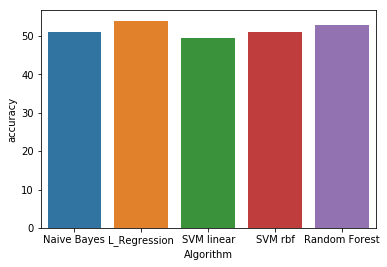

In [173]:
sns.barplot(x =unwgt_df.Algorithm , y = unwgt_df.accuracy)

In [175]:
#for normalized dataset
n_accuracy=[b_1,b_2,b_3,b_4,b_5]

F1_score = [f_1,f_2,f_3,f_4,f_5]
print("Normalised dataset")
d_2 = {
        'Algorithm' : ['Naive Bayes','L_Regression','SVM linear','SVM rbf',
                       'Random Forest'],
        'F1score' : F1score,
         'accuracy' :n_accuracy,
       }

norm_df =pd.DataFrame(d_2)
norm_df

Normalised dataset


,Algorithm,F1score,accuracy
0,Naive Bayes,0.387500,51.0
1,L_Regression,0.510638,54.0
2,SVM linear,0.372671,49.5
3,SVM rbf,0.387500,51.0
4,Random Forest,0.494624,48.5


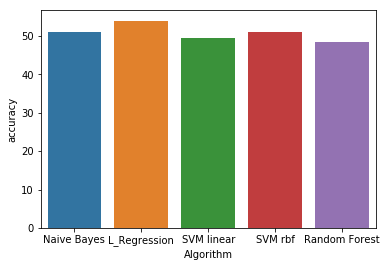

In [176]:
sns.barplot(x =norm_df.Algorithm , y = norm_df.accuracy)

## CONCLUSION :
Hence Accracy and f1_score of all models are compared.